## Problem Statement

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball.

1. Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls.
2. Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
3. Provide descriptive statistical summaries of the data for each model.

Additionally:

a. Check if shapiro and levene tests work fine for the data.  
b. Calculate Pooled Standard Deviation  
c. Calculate Sample power  

In [141]:
#import all libraries required for the project
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from scipy.stats import norm, t, skew, kurtosis, shapiro, levene, ttest_ind, iqr
from statsmodels.api import qqplot
from statsmodels.stats.api import CompareMeans, DescrStatsW
from statsmodels.stats.power import ttest_power, TTestIndPower

In [142]:
#We don't have to use plt.draw() everytime to draw plot outputs
%matplotlib inline


In [143]:
#Import the dataset using pandas excel read
df=pd.read_excel('SM4-Golf.xls')

In [144]:
#show the data
df

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [145]:
#Pandas Profiling
pandas_profiling.ProfileReport(df)

Number of variables,2
Number of observations,40
Total Missing (%),0.0%
Total size in memory,720.0 B
Average record size in memory,18.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0




#### For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:
* **Essentials**:  type, unique values, missing values
* **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range
* **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* **Most frequent values**
* **Histogram**
* **Correlations** highlighting of highly correlated variables, Spearman and Pearson matrixes




In [146]:
# display the size and shape of the dataset
df.shape

(40, 2)

In [147]:
#get data type and column names along with the count of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [148]:
#Generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset’s distribution,
#excluding NaN values.
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


### Observations
1. The dataset has 2 columns (Current and New)
2. It has 40 rows
3. Both columns are of type integer
4. There are No null or missing values
5. Both these columns contain the distance travelled in yards by the current and new balls respectively 
6. Both the samples have almost equal mean and median, Hence they are normally distributed.
7. There are no outliers present in the dataset

##### Compute the interquartile range of the data.

The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers

In [149]:
iqr(curr_balls)

12.25

In [150]:
iqr(new_balls)

12.5

### Observation:
Interquartile range in both current ball and the new ball is almost same.

In [151]:
# current balls and new balls dataframe
curr_balls = df['Current']
new_balls = df['New']

### Q1. Provide descriptive statistical summaries of the data for each model.

#### Central Tendancy

In [152]:
# Central tendency of the Current Model
mode = 'No unique mode'
try:
    mode = stats.mode(curr_balls)
except:
    pass
print('''Central tendency of current model:\nmean: {}\nmedian: {}\nmode: {}\nharmonic mean: {}
low median: {}\nhigh median: {}\ngrouped median: {}'''.format(
    stats.mean(curr_balls), stats.median(curr_balls), mode, stats.harmonic_mean(curr_balls),
    stats.median_low(curr_balls), stats.median_high(curr_balls), stats.median_grouped(curr_balls)))

Central tendency of current model:
mean: 270.275
median: 270.0
mode: No unique mode
harmonic mean: 270.00089450236504
low median: 270
high median: 270
grouped median: 270.0


In [153]:
# Central tendency of the new model
mode = 'No unique mode'
try:
    mode = stats.mode(new_balls)
except:
    pass
print('''Central tendency of the new model:\nmean: {}\nmedian: {}\nmode: {}\nharmonic mean: {}
low median: {}\nhigh median: {}\ngrouped median: {}'''.format(
    stats.mean(new_balls), stats.median(new_balls), mode, stats.harmonic_mean(new_balls),
    stats.median_low(new_balls), stats.median_high(new_balls), stats.median_grouped(new_balls)))

Central tendency of the new model:
mean: 267.5
median: 265.0
mode: No unique mode
harmonic mean: 267.1453401443853
low median: 264
high median: 266
grouped median: 265.5


#### Dispersion

In [154]:
# Dispersion of  the current model
print('Dispersion of the current model:\nvariance: {}\nstandard deviation: {}'.format(
    stats.variance(curr_balls), stats.stdev(curr_balls)))

Dispersion of the current model:
variance: 76.61474358974358
standard deviation: 8.752984838884595


In [155]:
# Dispersion of the new model
print('Dispersion of the new model:\nvariance: {}\nstandard deviation: {}'.format(
    stats.variance(new_balls), stats.stdev(new_balls)))

Dispersion of the new model:
variance: 97.94871794871794
standard deviation: 9.896904462947894


## Visualization

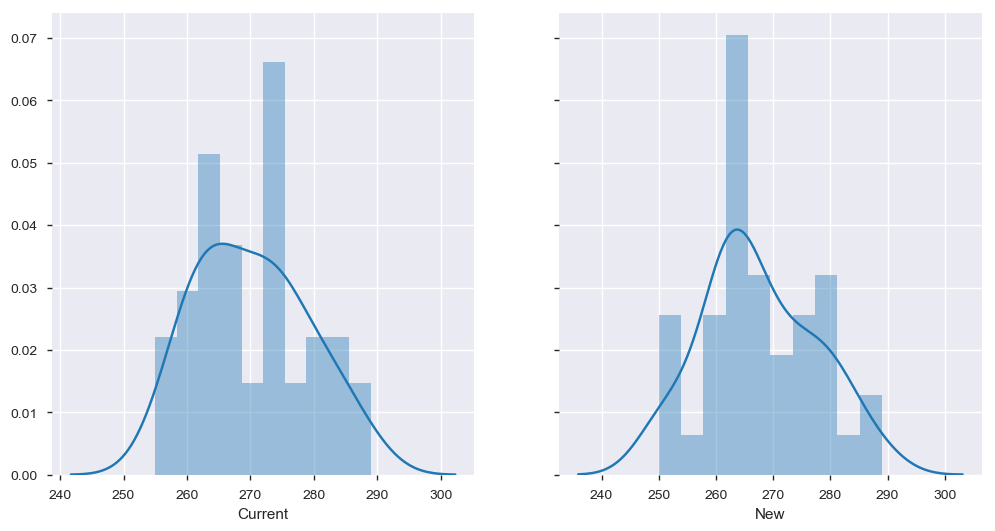

In [156]:
# Check the dataset skewness and spread
f, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
sns.distplot(curr_balls, bins=10, ax=axes[0])
sns.distplot(new_balls, bins=10, ax=axes[1])

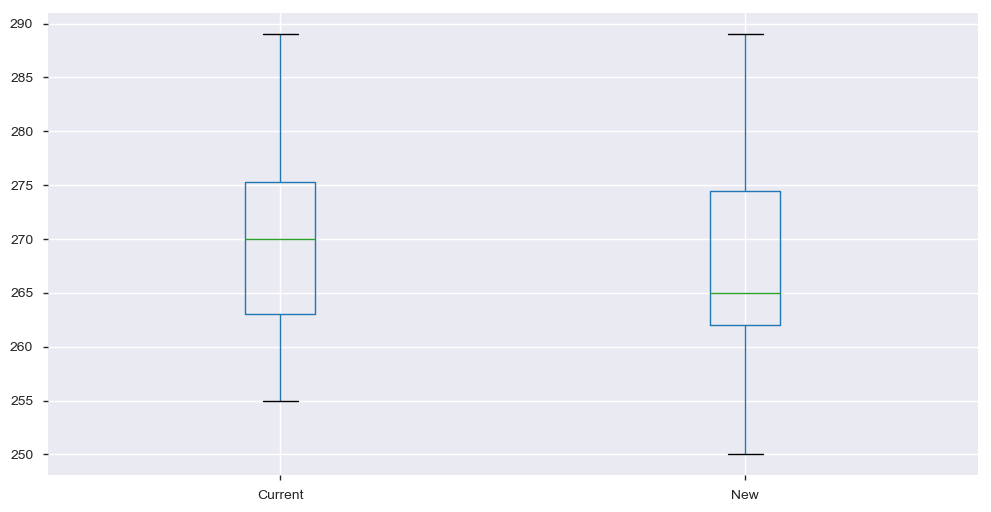

In [157]:
# Check for central tendency - CURR_BALL VS NEW_BALL
df.boxplot(figsize=(12,6))


1. Looking at the above figures it is clear that both the new ball and current ball are almost normally distributed. New Ball data appears to be right skewed
2. The samples of new ball have more scattered observations than the samples of current ball. This is proved by a greater standard deviation of new ball samples.
3.  It is not evident from the boxplot to draw a concrete solution whether the two sample means are equal or different from each other.

Conclusion: We will now apply inferential statistics.


## Q2. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

##### Normality Test

###### 1) Histogram
###### 2) Skewness and Kurtosis

In [158]:
# Skewness and Kurtosis for New Ball and Current Ball
print('Current ball has a \nSkewness of {} \nKurtosis of {} (Fischer\'s coeff) \nKurtosis of {} (Pearson\'s coeff)'
      .format(skew(curr_balls), kurtosis(curr_balls, fisher=True), kurtosis(curr_balls, fisher=False)))
print('\n')
print('New ball has a \nSkewness of {} \nKurtosis of {} (Fischer\'s coeff) \nKurtosis of {} (Pearson\'s coeff)'
      .format(skew(new_balls), kurtosis(new_balls, fisher=True), kurtosis(new_balls, fisher=False)))

Current ball has a 
Skewness of 0.29456628634379833 
Kurtosis of -0.8168840741950509 (Fischer's coeff) 
Kurtosis of 2.183115925804949 (Pearson's coeff)


New ball has a 
Skewness of 0.23072220761583526 
Kurtosis of -0.59881719251117 (Fischer's coeff) 
Kurtosis of 2.40118280748883 (Pearson's coeff)



#### Observation:
The values for Skewness and Kurtosis are not indicating whether the samples are from a normal distribution or not.

#### 3) Q-Q Plot (Quantile-Quantile Plot)

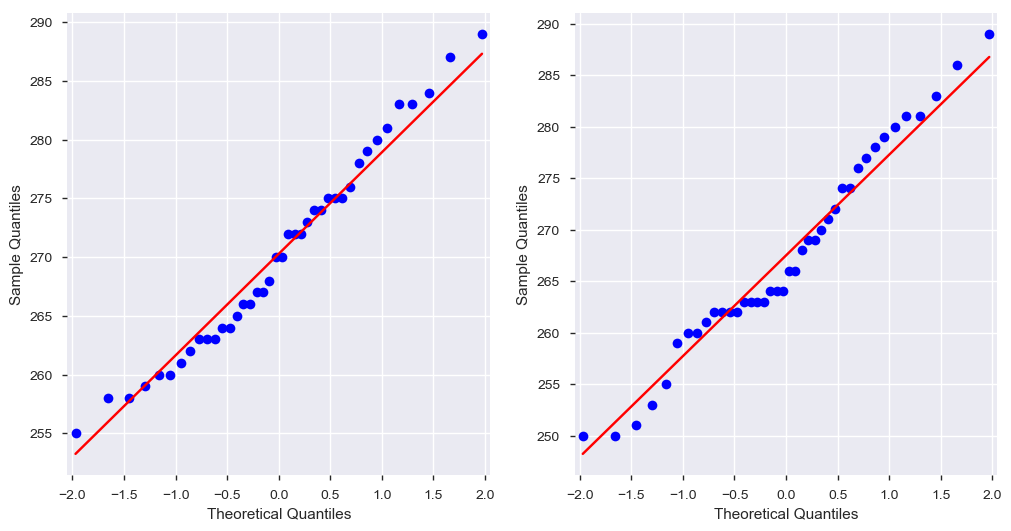

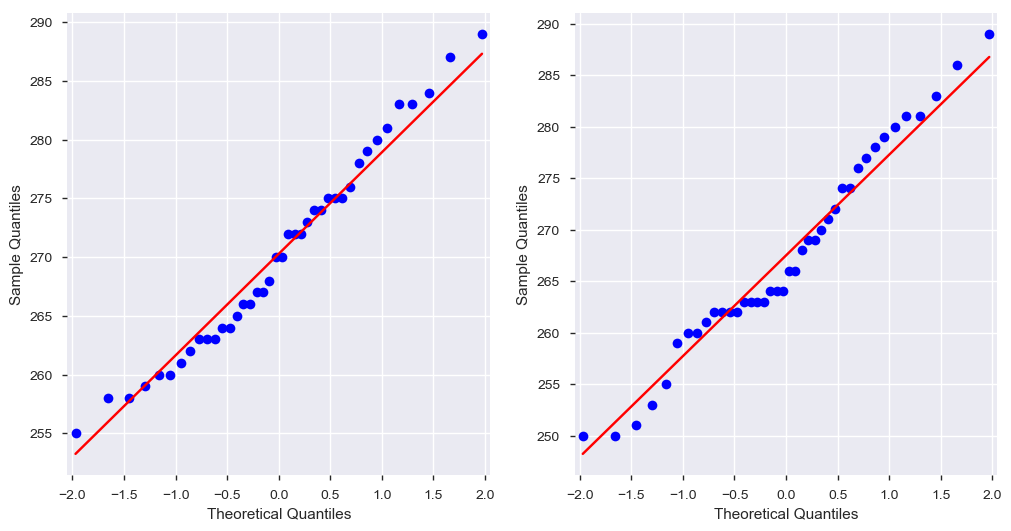

In [159]:
f, ax = plt.subplots(1,2,figsize=(12,6))
qqplot(curr_balls, line='s', ax=ax[0])
qqplot(new_balls, line='s', ax=ax[1])

##### Observation:
The Q-Q Plot intends to visually represent that, both the samples follow the same distribution. They are roughly aligned along the red line which corresponds to a standard normal distribution.

##### 4) Shapiro-Wilk Test

In [160]:
# Test stat for current ball sample
w_stat, p_value = shapiro(curr_balls)
print('w-statistics: {}\np-value: {}'.format(w_stat, p_value))

w-statistics: 0.9707045555114746
p-value: 0.37878310680389404


In [161]:
# Test stat for new ball sample
w_stat, p_value = shapiro(new_balls)
print('w-statistics: {}\np-value: {}'.format(w_stat, p_value))

w-statistics: 0.9678265452384949
p-value: 0.3064688742160797


##### Conclusion:
Calculated w-statistics for both the samples tends to 1.
Considering the significance level (α) of 0.05, the calculated p-value for both the samples is greater than α. Hence we fail to reject the null hypothesis ( H0) which says both the samples are drawn from a Normal Population.

#### Test of Homogenity


Test of Homogenity of variance is conducted to determine if two samples have equal variances or not.

###### 1) Levene Test

In [162]:
levene(curr_balls, new_balls)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

#### Observation:
Considering the significance level (α) of 0.05, the calculated p-value for this test is greater than α. Hence we fail to reject null hypothesis (H0) which says Both the samples are homogenous in variances.

##### Note:
From the above tests of Normality and Homogenity, we conclude the original population is parametric and as we have two independent samples with us, we go ahead and apply Two Sample parametric T-Test

### Two Sample Test

##### 1) Student's T-Test


In [163]:
ttest_ind(curr_balls, new_balls)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

##### Critical value
Considering significance level of 0.05, let's calculate the t-critical - the boundary between the Power and Significance level of the test.

In [164]:
alpha = 0.05
df = len(curr_balls) + len(new_balls) - 2 # Degrees of freedom
t.ppf(1 - alpha, df)

1.6646246444385238

### Q3. Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

##### Observation

1. The critical value of t test found out to be 1.665. But as our t-statistics value is less than t-critical, we are falling under the acceptance region of Null hypothesis ( H0 )
2. The calculated p-value (0.188) for this test is greater than  α . Hence we fail to reject the null hypothesis ( H0 ) which says Both the population means are equal. i.e. there is no significant statistical evidence that the new cut-resistance ball has any impact on the driving distance as compared to the current ball.
3. Based of 2 sample t-test , I would recommend PAR INC to go ahead with production of new ball. However, we have to do the **Power Of Test** to conclude our observations.


Exploring confidence interval, Power of the test ($1-\beta$), Power analysis, whether we require a larger sample etc

### Q4. What is the 95% confidence interval for the population mean of each model. And what is the 95% confidence interval for the difference between the means of the two population?

In [165]:
# CI for current ball mean
mu, sigma = curr_balls.mean(), curr_balls.std()
scale = sigma/np.sqrt(len(curr_balls))
norm.interval(alpha=0.05, loc=mu, scale=scale)

(270.1882157995571, 270.36178420044286)

In [166]:
# CI for new ball mean
mu, sigma = new_balls.mean(), new_balls.std()
scale = sigma/np.sqrt(len(new_balls))
norm.interval(alpha=0.05, loc=mu, scale=scale)

(267.40187405136805, 267.59812594863195)

We are 95% confident that the average driving distance of the current ball population varies between 270.19 to 270.36
We are 95% confident that the average driving distance of the new ball population varies between 267.4 to 267.6

### 95% CI for difference in two population mean

In [167]:
point_estimate = curr_balls.mean() - new_balls.mean()
cm = CompareMeans(DescrStatsW(curr_balls), DescrStatsW(new_balls))
ci = cm.tconfint_diff(alpha=0.05, usevar='pooled')
print('Point Estimate: {}\nConfidence Interval: {}'.format(point_estimate, ci))

Point Estimate: 2.7749999999999773
Confidence Interval: (-1.3839584057317742, 6.933958405731729)


###### Observation:
The difference in the two population mean lies in between -1.38 to 6.93 with 95% confindence level. In the context of the problem, we are 95% confident that the average distance travelled for current ball is -1.38 to 6.93 yards more than the new ball.

### Q5. Do you see a need for larger sample sizes and more testing with the golf balls? 

#### Power of the test ( 1−β )

In [168]:
x1_bar = np.mean(curr_balls)
x2_bar = np.mean(new_balls)
n1 = curr_balls.count()
n2 = new_balls.count()
s1_sq = curr_balls.var()
s2_sq = new_balls.var()
s_pooled = np.sqrt(((n1-1)*s1_sq + (n2-1)*s2_sq) / ((n1-1)+(n2-1)))
delta = (x1_bar - x2_bar) / s_pooled
print('Pooled standard deviaton: {}\ndelta: {}'.format(s_pooled, delta))

Pooled standard deviaton: 9.342469200871404
delta: 0.2970306821820877


In [169]:
ttest_power(delta, nobs=n1, alpha=0.05, alternative="two-sided")

0.4492741885390427

The power of the test ( 1−β ) denotes that there is 44.9% probability we rejecting the null hypothesis while the null hypothesis is also false. It is too low as we actually accepted the Null Hypothesis saying there is no significant difference between the two sample means.

#### Power Analysis

Power analysis to determine the required sample size to achieve atleast 80% power of the test.

In [170]:
# Parameter for power analysis
alpha = 0.05
power = 0.8
# Perform Power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=delta, alpha=alpha, power=power)
print('Required sample size:', np.ceil(result))

Required sample size: 179.0


Observation: In order to achieve 80% power of the test, we require a sample size of minimum 179.

### Hypothesis testing check list
Let's look at the checklist for Hypothesis testing

| Steps | Description |
| ------ | ----------- |
| Type of test | **Mean** / ~~Propertion~~ / ~~Variance~~ |
| Sample | ~~One~~ / **Two** |
| Null Hypothesis<br/>($H_{0}$) | $\mu_{1}=\mu_{2}$ (**The two population means are equal**) |
| Alternate Hypothesis<br/>($H_{a}$) | $\mu_{1}\neq\mu_{2}$ (**The two population means are not equal**) |
| Tails | ~~Left~~ / ~~Right~~ / **Both** |
| Level of Significance<br/>($\alpha$) | **0.05** |
| Statistical Test | ~~Z~~ / **T** / ~~Chi-Square~~ / ~~F~~ |
| Test Statistics | t-statistics = **1.328**, p-value = **0.188** |
| Critical Value | t-critical = **1.665** |
| Confidence Level | **95%** |
| Confidence Interval | Avg. driving distance: Current ball: (**270.19**, **270.36**), New ball: (**267.4**, **267.6**), Difference in mean of two types of balls: (**-1.38**, **6.93**) |
| Acceptance / Rejection | **Failed to reject the null hypothesis ($H_{0}$)** |
| Inference | There is **no statistical evidence that the two types of balls differ from each other in terms of average distance travelled in yards** with the provided sample size. However to obtain 80% power of the test **we require 179 or above sample size** from Par Inc. |